# Grammer and Online Product Reviews Exploration
## by [Alaaeldin Zaky]



## Preliminary Wrangling

> This document explores a dataset containing around 71,000 reviews for 1,000 different products. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#Loading the dataset from csv file and have a look at the data frame
df = pd.read_csv("GrammarandProductReviews.csv")
df.head(10)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,149773828.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,Samantha,67981934427
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,129088591.0,NaN,1,https://www.walmart.com/reviews/product/43383370,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,Raeanne,67981934427
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,131769441.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,Kimmie,67981934427
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,148314686.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband and I bought this for some extra fu...,Very disappointing,NaN,NaN,cassie,67981934427
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasur

In [4]:
#High-level overview on data types, shape, variety,and descriptive statisitics about the features in this dataset
print(df.shape)
print(df.dtypes)
print(df.describe())

(71044, 25)
id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object
         reviews.id  reviews.numHelpful  reviews.rating
count  3.215800e+04        32508.000000    71044.000000
mean   7.944753e+07            0.410422        4.385747
std   

In [5]:
# Check for the null values across different features 
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [6]:
# Check the number of row duplicates for this dataset
np.sum(df.duplicated() == True)


0

### What is the structure of your dataset?

> The dataset has more than 71,000 reviews for different product. The dataset has multiple features regarding the product being reviewd such as product ID, brand, manufacturer and some features about the review itself such as ID, reviewer's username and city, rating (from 1 to 5), recommendation (True or False), and text review in words. 


### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is the length(in characters) of text review. This feature will be engineered.
> The question we will be addressing is: How does review length differ by the features listed in the coming question.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We are trying to predict the length of text review based on many features in this dataset such as: product rating, recommendation, product category/brand/manufacurer, title length.

In [7]:
#Drop unneeded columns(features)
df_reviews = df[["id", "brand", "categories", "manufacturer", "reviews.id", "reviews.rating", "reviews.doRecommend", "reviews.title", "reviews.text"]]

In [8]:
# Remove all NAN values for review.text
print(df_reviews['reviews.text'].isna().sum())
df_reviews.dropna(subset=['reviews.text'], inplace=True)
df_reviews.info()

36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71008 entries, 0 to 71043
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   71008 non-null  object 
 1   brand                71008 non-null  object 
 2   categories           71008 non-null  object 
 3   manufacturer         70867 non-null  object 
 4   reviews.id           32156 non-null  float64
 5   reviews.rating       71008 non-null  int64  
 6   reviews.doRecommend  60427 non-null  object 
 7   reviews.title        70544 non-null  object 
 8   reviews.text         71008 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 5.4+ MB


c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#Feature Engineering: Adding a feature for the length of the text reviews & title review
df_reviews['reviews.text_len'] = df_reviews['reviews.text'].apply(len)
df_reviews['reviews.title_len'] = df_reviews.dropna(subset=['reviews.title'])['reviews.title'].apply(len)
df_reviews.head()

c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,brand,categories,manufacturer,reviews.id,reviews.rating,reviews.doRecommend,reviews.title,reviews.text,reviews.text_len,reviews.title_len
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,NaN,5,NaN,Just Awesome,i love this album. it's very good. more to the...,201,12.0
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,100209113.0,5,NaN,Good,Good flavor. This review was collected as part...,62,4.0
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,100209113.0,5,NaN,Good,Good flavor.,12,4.0
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,113026909.0,1,False,Disappointed,I read through the reviews on here before look...,696,12.0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,171267657.0,1,False,Irritation,My husband bought this gel for us. The gel cau...,132,10.0


## Univariate Exploration

> In this section, the distributions of features are investigated.
Prior to plotting feature distributions, data cleaning step is performd. 

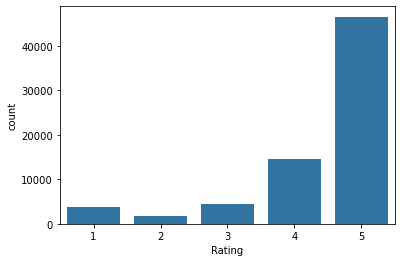

In [10]:
#Distribution of rating 
base_color = sb.color_palette()[0]
sb.countplot(data=df_reviews, x='reviews.rating', color=base_color)
plt.xlabel("Rating");

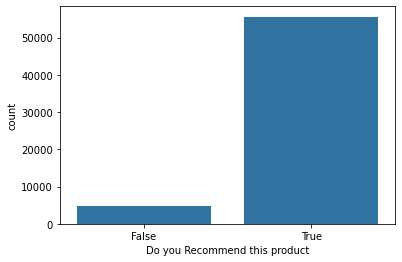

In [11]:
# Distribution of recommendation
sb.countplot(data=df_reviews, x='reviews.doRecommend', color=base_color)
plt.xlabel("Do you Recommend this product");

>As we can see from the previous distributions that data is imbalanced. Most of the rating reviews are positive reviews. 

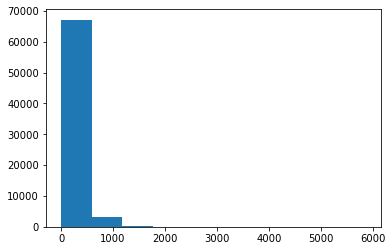

In [12]:
#plot histogram of the length of the text reviews 
plt.hist(data=df_reviews, x='reviews.text_len');

In [13]:
# Spot outliers 
# Viewing a sample long review
df_reviews[df_reviews['reviews.text_len'] > 2000].iloc[1]['reviews.text']
#looks like a real review 

"One might call Mike and Dave Need Wedding Dates director Jake Szymanski's feature debut and to a degree I guess that's correct as this is his first film getting a wide theatrical release (and his first that runs over an hour), but Szymanski is no stranger to comedy or the space in which it occupies in Hollywood. In fact, Szymanski turned Andy Samberg's rather thin idea for a 30 for 30 parody into a rather entertaining forty-five minutes last summer. All of this doesn't necessarily mean that Mike and Dave is anything more than one might expect it to be (it's not) and despite sounding like one of those straight to VHS American Pie knock-offs where you might find Tara Reid and the chubby kid from The Sandlot working not-so hard to earn a paycheck, Mike and Dave actually delivers on the promises and premise that have been set up in its marketing. Though it might seem obvious that 20th Century Fox would like to make something of a comedic brand out of Mike and Dave (Mike & Dave Go to Londo

In [14]:
# Spot duplictes
np.sum(df_reviews.duplicated() == True)


137

In [15]:
#Remove duplicate observations(rows)
df_reviews.drop_duplicates(inplace=True)

c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


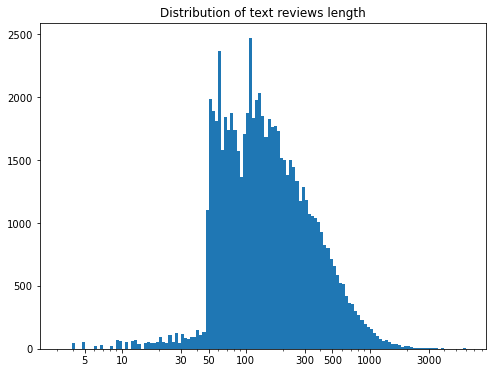

In [16]:
#Plot histogram of the length of the text reviews in logscale 
log_bins = 10 ** np.arange(0.5, np.log10(max(df_reviews['reviews.text_len'])) + 0.025, 0.025)
plt.figure(figsize = [8,6])
plt.hist(data=df_reviews, x='reviews.text_len', bins=log_bins);
plt.xscale('log')
plt.xticks([5, 10, 30, 50, 100, 300, 500, 1000, 3000], [5, 10, 30, 50, 100, 300, 500, 1000, 3000])
plt.title("Distribution of text reviews length");

> It looks like from the previous histogram that review length varies widely from 5 characters to more than 1000 characters per review. There is a sudden jump at 50 characters per review. The distribution remains high until almost 200 characters per view then decays gradually.

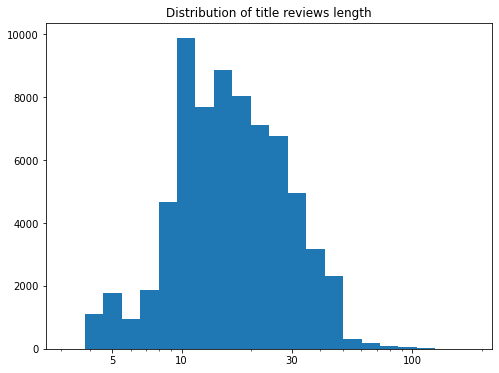

In [17]:
#Plot histogram of the length of the title reviews in logscale 
log_bins = 10 ** np.arange(0.5, np.log10(max(df_reviews['reviews.title_len'])) + 0.08, 0.08)
plt.figure(figsize = [8,6])
plt.hist(data=df_reviews, x='reviews.title_len', bins=log_bins);
plt.xscale('log')
plt.xticks([5, 10, 30, 100], [5, 10, 30, 100])
plt.title("Distribution of title reviews length");

> The distribution of length of title review looks similar to the length of text reviews (only the range is differenet). Both distribution are right-skewed, so log transformation is perfromed. 

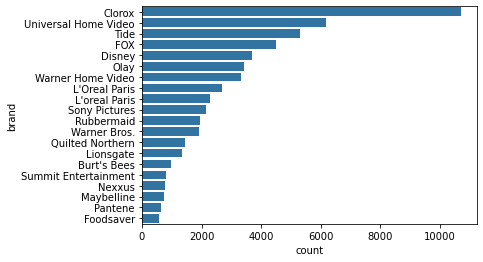

In [18]:
# Bar chart for the highest 20 brands 
brand_index = df_reviews['brand'].value_counts()[:20].index
sb.countplot(data=df_reviews[df_reviews['brand'].isin(brand_index)], y='brand', order=brand_index, color=base_color)

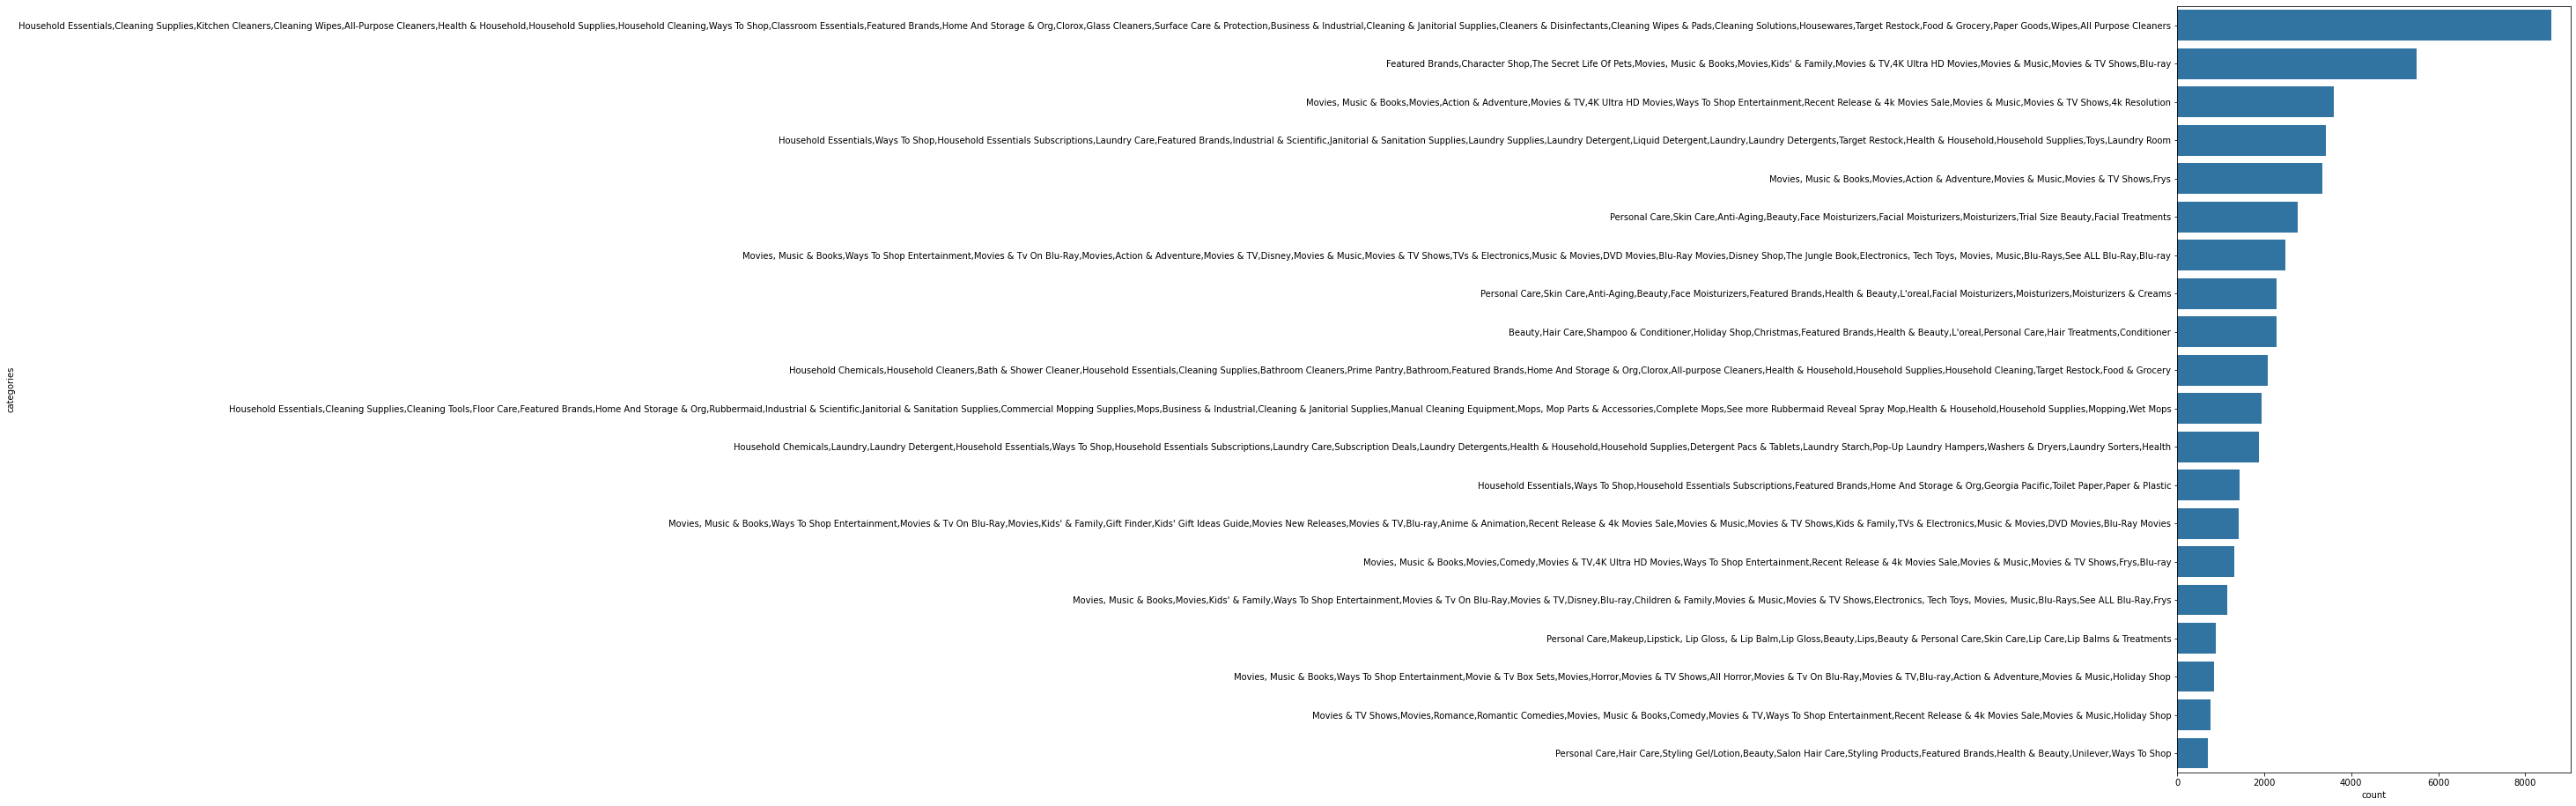

In [19]:
# Bar chart for the highest 20 categories
plt.figure(figsize=[8, 16])
categories_index = df_reviews['categories'].value_counts()[:20].index
sb.countplot(data=df_reviews[df_reviews['categories'].isin(categories_index)], y='categories', color=base_color, order=categories_index);

In [20]:
df_reviews['categories'].value_counts()

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8606
Featured Brands,Character Shop,The Secret Life Of Pets,Movies, Music & Books,Movies,Kids' & Family,Movies & TV,4K Ultra HD Movies,Movies & Music,Movies & TV Shows,Blu-ray                                                                                                                                                                                                                                                                                                              5510
Movies, Music & Books,Movies,Action & Adventur

> There are so many categoreis with very long names. The categoreis have so much in common. 
In the coming cells, 'generic_category' feature will be engineered. The feature will capture the similarites between categories and will give a short name for each category. 

In [21]:
def list_similarities(list_all):
    """ Estimates the proportion of similiraty between multiple lists and returns the lists with similarites higher than 50%.
    Arguments: 
    list_all: list of lists - the function finds the similarities between all the combinations of these lists
    returns: a list of tuples - each tuple represents the indeces of the the two similar lists
    """
    list_of_similarities_index = []
    for list_idx, list_a in enumerate(list_all):
        for idx in range(list_idx + 1, len(list_all)):
            list_b = list_all[idx]
            similarity_percentage = len(set(list_a) & set(list_b)) / max(len(list_a), len(list_b))
            #print("{:3f}    ({},{})".format(similarity_percentage,list_idx, idx))
            if(similarity_percentage >= 0.5):
                list_of_similarities_index.append((list_idx, idx))
    return list_of_similarities_index

In [22]:
# Get the index for categories 
categories_index = df_reviews['categories'].value_counts().index
#transfrom type "pandas.core.indexes.base.Index" to list 
categories_list = categories_index.format()

# List of lists .. each list has strings for all sub-category names in each category  
categories_longname_list = [label.split(',') for label in categories_list]

# Find the similarites between categories
similarities_output = list_similarities(categories_longname_list)


In [23]:
# get list for lists for indeces: index_lists
index_lists  = []
for similar_tuple in similarities_output:
    list_found = False
    for index_list in index_lists:
        if similar_tuple[0] in index_list:
            index_list.append(similar_tuple[1])
            list_found = True
            break
    if list_found == False:
        index_lists.append([similar_tuple[0], similar_tuple[1]])
        
#print(index_lists)

In [24]:
def most_frequent(List): 
    """ Get the most frequent word.
    List: list of strings
    returns: The most frequent string in 'List'
    """
    return max(set(List), key = List.count) 

In [25]:
#Construct a dictionary: {"Category": most frequent word in similar category names}
category_dict = {}
for index_list in index_lists:
    category_name_list = []
    for category in index_list:
        temp_list =  df_reviews['categories'].value_counts().index[category].split(',')
        category_name_list.extend(temp_list)
    category_new_name = most_frequent(category_name_list)
    category_list = df_reviews['categories'].value_counts().index[index_list]
    category_dict.update(dict.fromkeys(category_list, category_new_name))
    
#print(len(category_dict))
#print("{:<80}      {:<10}".format('Key', 'label'))
#for key,label in category_dict.items():
#    print("{:<80}      {:<10}".format(key[:80], label))

In [26]:
def generic_category_name(name):
    """Get the new category name.
    name: category name
    return: new generic category name
    """
    if name in category_dict:      
        return category_dict[name]
    else:
        return name.split(',')[0]

df_reviews['generic_categories'] = df_reviews['categories'].apply(generic_category_name)

c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


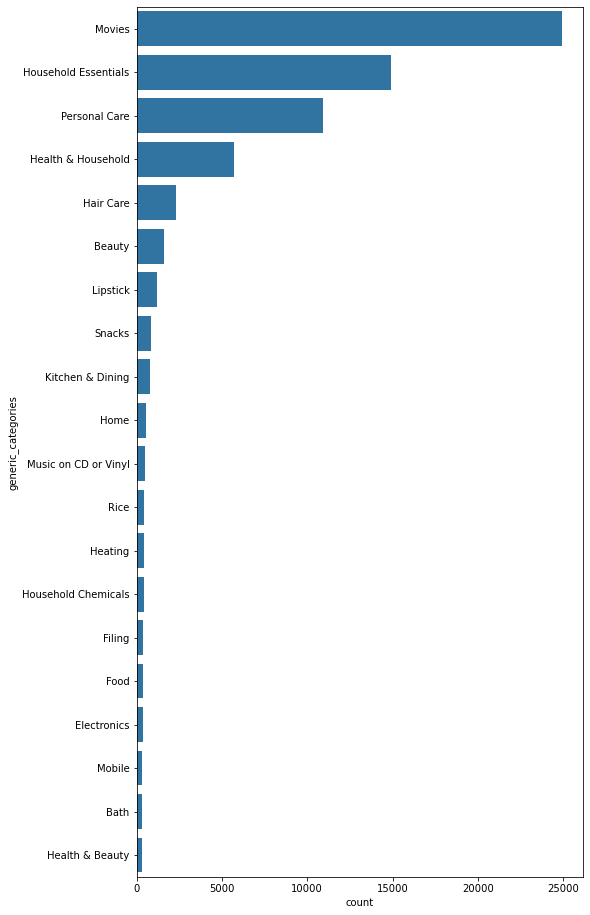

In [27]:
# Bar chart for the highest 20 categories (for the new generic category names)
plt.figure(figsize=[8, 16])
generic_categories_index = df_reviews['generic_categories'].value_counts()[:20].index
sb.countplot(data=df_reviews[df_reviews['generic_categories'].isin(generic_categories_index)], y='generic_categories', color=base_color, order=generic_categories_index);

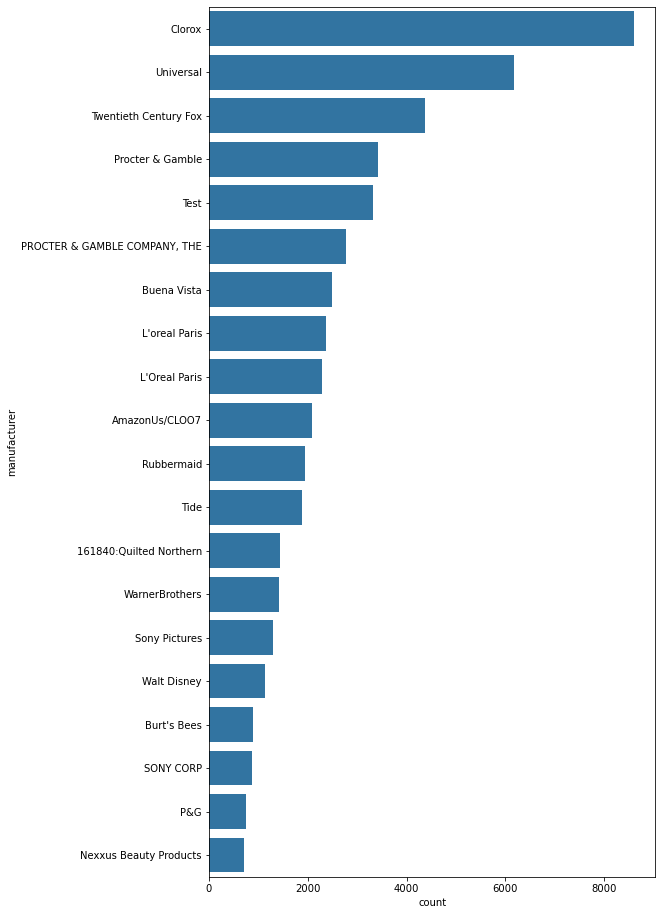

In [28]:
# Bar chart for the highest 20 manufacturers
plt.figure(figsize=[8,16])
manufacturer_index = df_reviews['manufacturer'].value_counts()[:20].index
sb.countplot(data=df_reviews[df_reviews['manufacturer'].isin(manufacturer_index)], y='manufacturer', color=base_color, order=manufacturer_index);

> Distribution of brands, categories, manufacturer looks similar to each other. The major part of the dataset is collected from a short list of brands/categories/manufacturers and there are less observations for multiple brands/categories/manufacturers.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> Text review length variable in the dataset take on a very large range of values, from about 5 characters at the lowest, to more than 3000 charachters at the highest. Plotted on a logarithmic scale, the histogram of text reviews length of takes on a bimodal shape.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> I found from the distribution of ratings and categories that the data is imbalanced. Most of the reviews are positive and are collected from small range of categoories. 
> When investigating the review.text variable I found some NULL variables and some duplicated reviews so I removed them. Also when investigating the categry variable I found that there are so many categoreis with very long names and have so much in common, so I engineered a new feature 'generic_category' which will capture the similarites between categories and will give a short name for each category.


## Bivariate Exploration

> In this section, relationships between pairs of variables in this dataset are investigated.


In [29]:
# correlation plot
#numeric_vars = 'reviews.'
#plt.figure(figsize = [8, 5])
#sb.heatmap(diamonds[numeric_vars].corr(), annot = True, fmt = '.3f',
#           cmap = 'vlag_r', center = 0)
#plt.show()

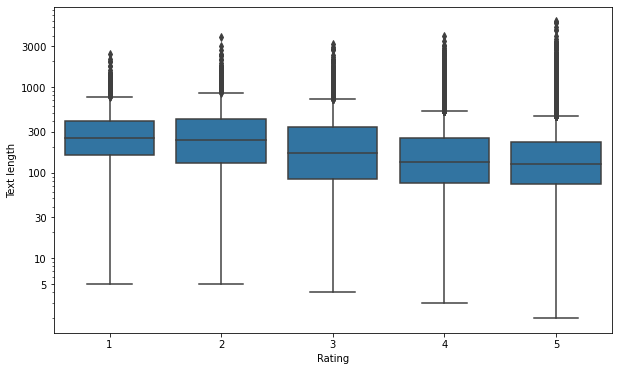

In [30]:
# Plot length of text's review vs review's rating 
plt.figure(figsize=[10,6])
sb.boxplot(data=df_reviews, x='reviews.rating', y='reviews.text_len', color=base_color)
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30,100, 300, 1000, 3000])
plt.xlabel("Rating")
plt.ylabel("Text length");

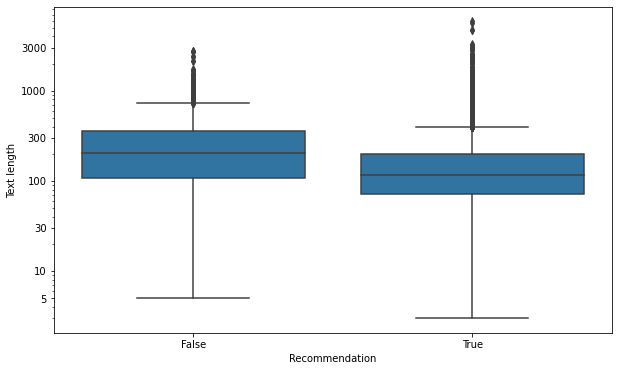

In [31]:
# Plot length of text's review vs review's rating 
plt.figure(figsize=[10,6])
sb.boxplot(data=df_reviews, x='reviews.doRecommend', y='reviews.text_len', color=base_color)
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30, 100, 300, 1000, 3000])
plt.xlabel("Recommendation")
plt.ylabel("Text length");

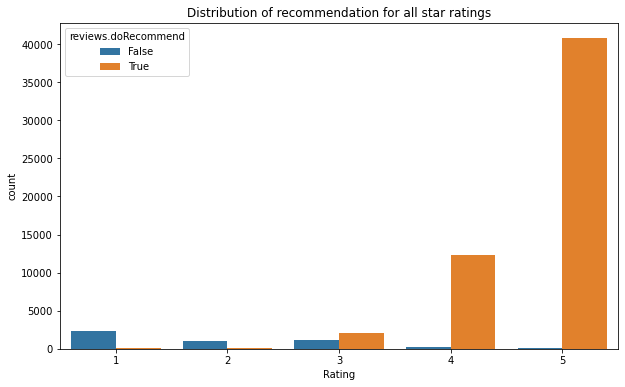

In [32]:
# Distribution of recommendation for all star ratings 
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
sb.countplot(data=df_reviews, x='reviews.rating', hue='reviews.doRecommend')
plt.xlabel("Rating");
plt.title("Distribution of recommendation for all star ratings");

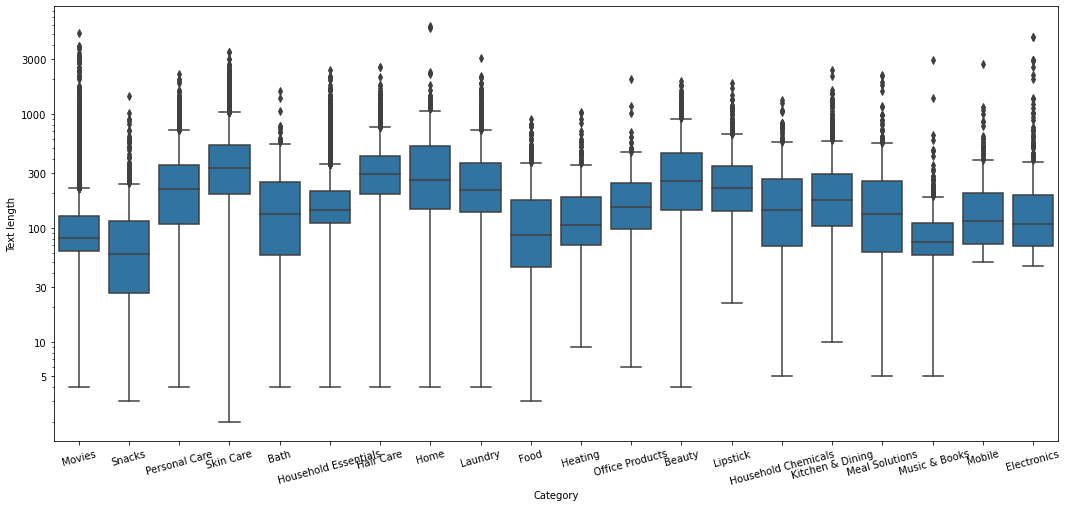

In [33]:
# Plot length of text's review vs Category 
bi_category_index = df_reviews['generic_categories'].value_counts()[:20].index
plt.figure(figsize=[18,8])
sb.boxplot(data=df_reviews[df_reviews['generic_categories'].isin(bi_category_index)], x='generic_categories', y='reviews.text_len', color=base_color)
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30, 100, 300, 1000, 3000])
plt.xticks(rotation=15)
plt.xlabel("Category")
plt.ylabel("Text length");

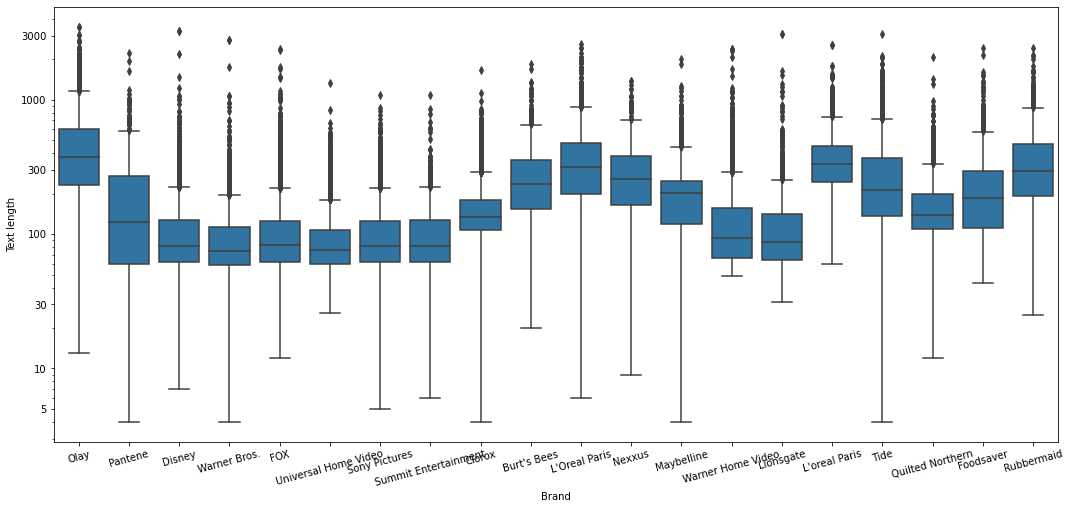

In [34]:
# Plot length of text's review vs Category 
bi_category_index = df_reviews['brand'].value_counts()[:20].index
plt.figure(figsize=[18,8])
sb.boxplot(data=df_reviews[df_reviews['brand'].isin(bi_category_index)], x='brand', y='reviews.text_len', color=base_color)
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30, 100, 300, 1000, 3000])
plt.xticks(rotation=15)
plt.xlabel("Brand")
plt.ylabel("Text length");

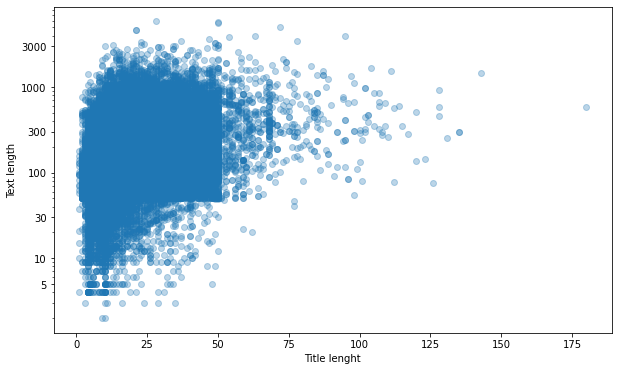

In [35]:
# Plot length of text's review vs length of the title review length  
plt.figure(figsize=[10,6])
plt.scatter(data=df_reviews, x='reviews.title_len', y='reviews.text_len', color=base_color, alpha=0.3)
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30, 100, 300, 1000, 3000])
#plt.xticks(rotation=15)
plt.xlabel("Title lenght")
plt.ylabel("Text length");

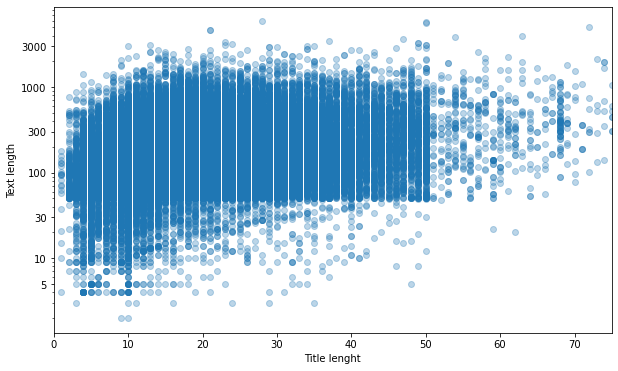

In [36]:
# Focusing only on the the title length value ranging from 0 to 75 
plt.figure(figsize=[10,6])
plt.scatter(data=df_reviews, x='reviews.title_len', y='reviews.text_len', color=base_color, alpha=0.3)
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30, 100, 300, 1000, 3000])
#plt.xticks(rotation=15)
plt.xlim((0,75))
plt.xlabel("Title lenght")
plt.ylabel("Text length");


>  In this section, the relationship between length of text reviews our main feature of interest with other features were investigated. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>It could be observed that negative reviews tend to have a longer text reviews. That is clear from the box plots of the text review length vs Rating and recommendation. From the visual exploration of the text review length vs category/brand, it could be observed that some categories such as beauty and home, personal care and home products tend to have a longer text reviews than other categories such as food and snacks.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> Recommendation and star ratings are highly correlated, which make much sense.

## Multivariate Exploration

> In this section, relationships between multiple variables in this dataset are investigated.

c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x864 with 0 Axes>

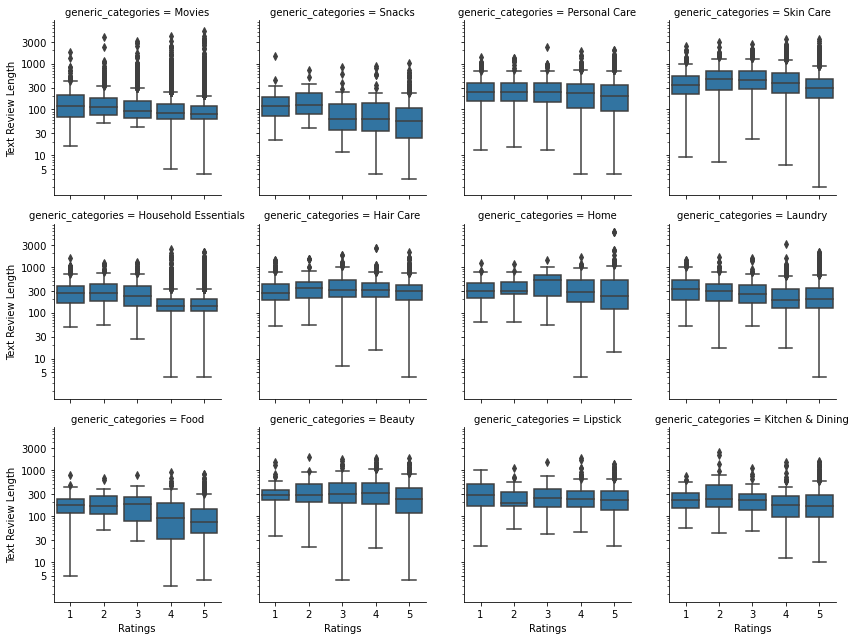

In [54]:
tri_category_index = df_reviews['generic_categories'].value_counts()[:12].index
g = sb.FacetGrid(data=df_reviews[df_reviews['generic_categories'].isin(tri_category_index)], col='generic_categories', margin_titles=True, col_wrap=4)
g.map(sb.boxplot, "reviews.rating", "reviews.text_len")
g.set_axis_labels("Ratings", "Text Review Length")
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30, 100, 300, 1000, 3000]);


c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


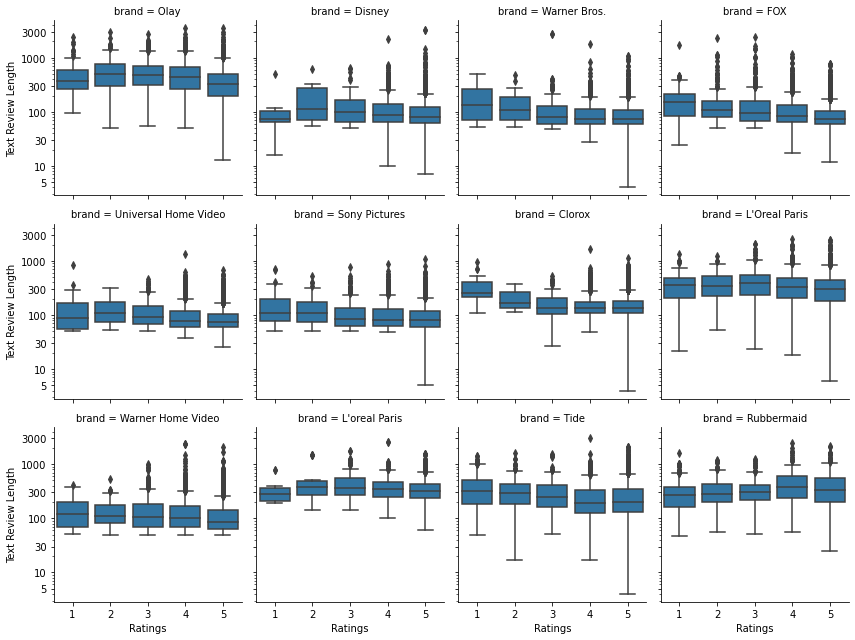

In [59]:
tri_brand_index = df_reviews['brand'].value_counts()[:12].index
g = sb.FacetGrid(data=df_reviews[df_reviews['brand'].isin(tri_brand_index)], col='brand', margin_titles=True, col_wrap=4)
g.map(sb.boxplot, "reviews.rating", "reviews.text_len")
g.set_axis_labels("Ratings", "Text Review Length")
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30, 100, 300, 1000, 3000]);

c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


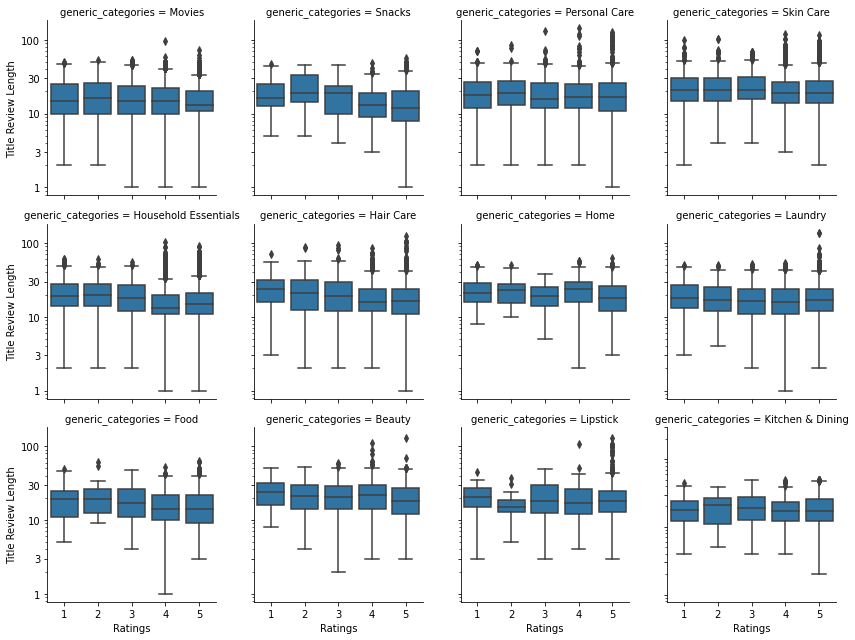

In [58]:
tri_category_index = df_reviews['generic_categories'].value_counts()[:12].index
g = sb.FacetGrid(data=df_reviews[df_reviews['generic_categories'].isin(tri_category_index)], col='generic_categories', margin_titles=True, col_wrap=4)
g.map(sb.boxplot, "reviews.rating", "reviews.title_len")
g.set_axis_labels("Ratings", "Title Review Length")
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300], [1, 3, 10, 30, 100, 300]);

c:\users\azaky\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


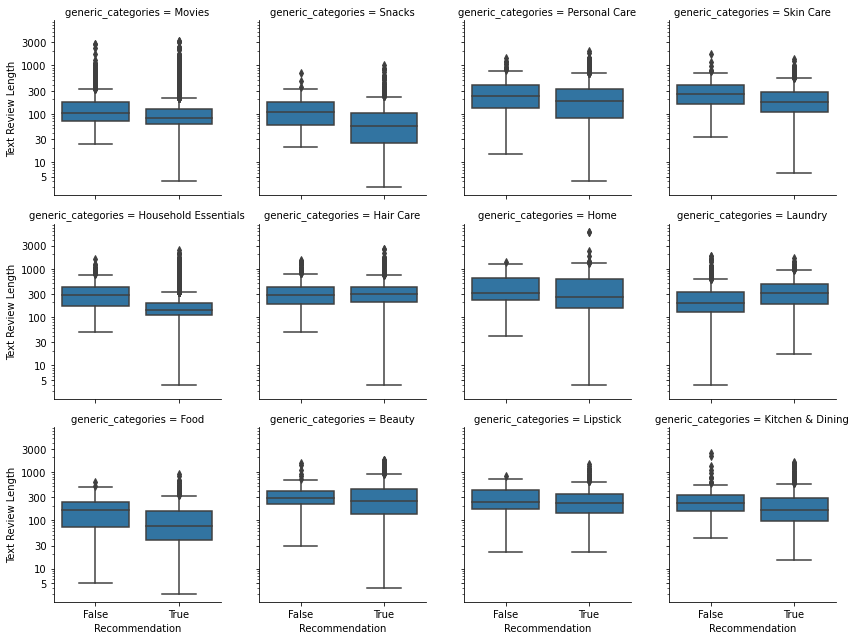

In [55]:
g = sb.FacetGrid(data=df_reviews[df_reviews['generic_categories'].isin(tri_category_index)], col='generic_categories', margin_titles=True, col_wrap=4)
g.map(sb.boxplot, "reviews.doRecommend", "reviews.text_len")
g.set_axis_labels("Recommendation", "Text Review Length")
plt.yscale('log')
plt.yticks([5, 10, 30, 100, 300, 1000, 3000], [5, 10, 30, 100, 300, 1000, 3000]);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> By comparing the text review length vs star ratings for different categoreis, we can observe that for the majority of categories the better the rating is the shorter the text review. This is depicted by comparing the median and inter-quantile range of the box plots. 
> The same observation could be noticed for the text review length vs star ratings for different categoreis box plot. This is because the high correlation between recommendation and star ratings. 
> Although this observation is not that clear for different brands. 
> Also this could not be concluded also for the length of the title review.


### Were there any interesting or surprising interactions between features?
> The interesting part that for many categories, the minimum length of the text review for 5 rating is much lower than the others, which could be understood that when people are satisfied with the product are more likely to give like a 1-word review.